In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [108]:
df = pd.read_csv(r'C:\Users\Shivan\Downloads\ITSFA Project\sales.csv')

In [150]:
df.head()

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
0,0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,08/11/2017
1,1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,08/11/2017
2,2,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12/06/2017
3,3,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11/10/2016
4,4,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11/10/2016


In [110]:
df.shape

(9800, 19)

# Question 1
# a. Perform any data cleaning and transformation steps needed.

In [111]:
df.isnull().sum()

Unnamed: 0        0
Row ID            0
Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order_Date        0
dtype: int64

###### Postal code has 11 null values.

###### Dealing with null values: 

In [112]:
# finding all countries in df
df['Country'].unique()

array(['United States'], dtype=object)

In [113]:
new_df = df[['State','City','Postal Code','Region']]
new_df.head()

,State,City,Postal Code,Region
0,Kentucky,Henderson,42420.0,South
1,Kentucky,Henderson,42420.0,South
2,California,Los Angeles,90036.0,West
3,Florida,Fort Lauderdale,33311.0,South
4,Florida,Fort Lauderdale,33311.0,South


In [114]:
new_df.drop_duplicates()

,State,City,Postal Code,Region
0,Kentucky,Henderson,42420.0,South
2,California,Los Angeles,90036.0,West
3,Florida,Fort Lauderdale,33311.0,South
5,California,Los Angeles,90032.0,West
12,North Carolina,Concord,28027.0,South
...,...,...,...,...
9647,Minnesota,Coon Rapids,55433.0,Central
9667,California,San Clemente,92672.0,West
9671,California,Dublin,94568.0,West
9701,California,San Luis Obispo,93405.0,West


In [115]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
2234,2234,2235,CA-2018-104066,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,05/12/2018
5274,5274,5275,CA-2016-162887,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,07/11/2016
8798,8798,8799,US-2017-150140,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,06/04/2017
9146,9146,9147,US-2017-165505,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,23/01/2017
9147,9147,9148,US-2017-165505,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,23/01/2017
9148,9148,9149,US-2017-165505,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,23/01/2017
9386,9386,9387,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,19/01/2018
9387,9387,9388,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,19/01/2018
9388,9388,9389,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,19/01/2018
9389,9389,9390,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,19/01/2018


In [116]:
df[(df['City'] =='Burlington') & (df['Region'] == 'East')]

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
2234,2234,2235,CA-2018-104066,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,05/12/2018
5274,5274,5275,CA-2016-162887,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,07/11/2016
8798,8798,8799,US-2017-150140,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,06/04/2017
9146,9146,9147,US-2017-165505,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,23/01/2017
9147,9147,9148,US-2017-165505,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,23/01/2017
9148,9148,9149,US-2017-165505,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,23/01/2017
9386,9386,9387,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,19/01/2018
9387,9387,9388,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,19/01/2018
9388,9388,9389,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,19/01/2018
9389,9389,9390,US-2018-127292,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,19/01/2018


###### All the postal code for Burlington city East are null. These values can't be replaced since there aren't any values where  Burlington city East are not null. So drop these null values

In [117]:
df.dropna(inplace=True)

In [118]:
df.isnull().sum()

Unnamed: 0       0
Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order_Date       0
dtype: int64

In [43]:
df.shape

(9789, 19)

##### drop unnecessary column

In [329]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [95]:
df.shape

(9789, 18)

##### check for duplicates

In [48]:
df[df.duplicated()] 

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date


###### no duplicated rows found

In [ ]:
df = df.drop(columns=['Year'])

# b. What insights can you gather based on the total sales per state?

In [119]:
total_sales_per_state = df.groupby('State')['Sales'].sum().reset_index()
total_sales_per_state.describe()

,Sales
count,48.000000
mean,46929.321098
std,79737.255213
min,919.910000
25%,7421.828500
50%,22365.088000
75%,48343.932500
max,446306.463500


###### 1. The data contains 48 states from USA.
###### 2. The average sales in USA is $46929.32
###### 3. 75% of the states have total sales are <= 48343.93
###### 4. 25% of the states have total sales are > 48343.93

In [120]:
total_sales_per_state.sort_values(by='Sales', ascending = False).head()

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
44,Washington,135206.8500
36,Pennsylvania,116276.6500


###### Shown above are the top 5 states with highest total sales

In [121]:
total_sales_per_state.sort_values(by='Sales').head()

,State,Sales
32,North Dakota,919.910
45,West Virginia,1209.824
17,Maine,1270.530
39,South Dakota,1315.560
47,Wyoming,1603.136


###### Shown above are the top 5 states with lowest total sales

# c. Choose two other meaningful columns to plot based on the sales data. Justify your choice of columns and explain what insights you can derive from the plots.

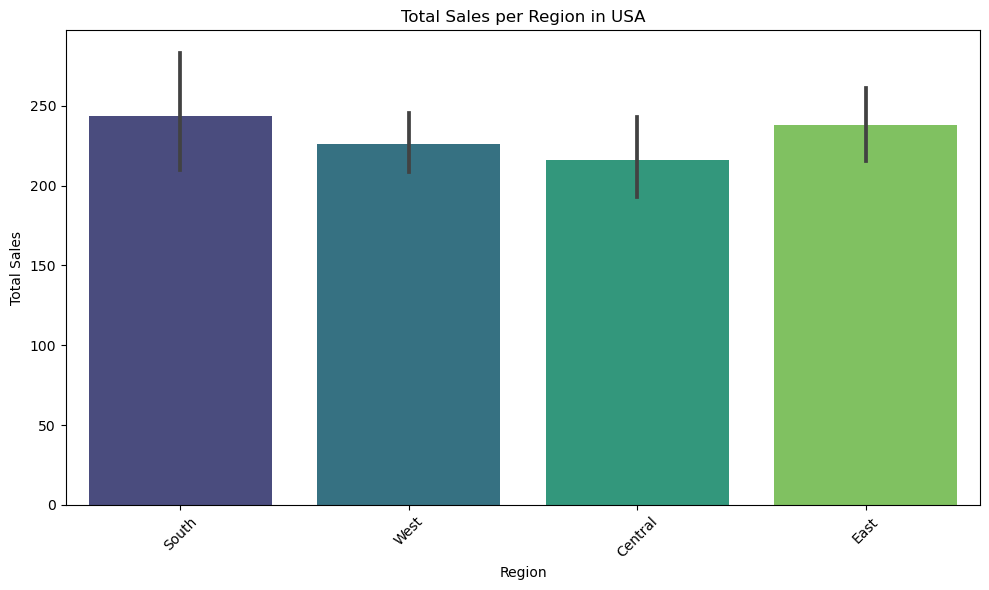

In [314]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, palette='viridis')
plt.title('Total Sales per Region in USA')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### From the plot above, we can see that from all regions in the US, South and East regions have the highest sales

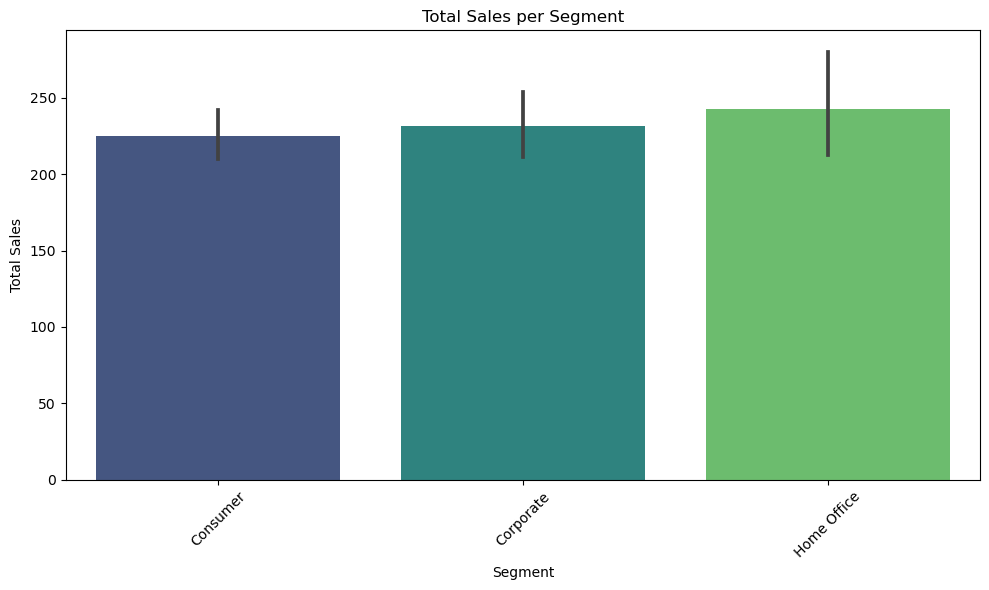

In [313]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=df, palette='viridis')
plt.title('Total Sales per Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### From the plot above, we can see that from all the different product segments. Home Office has the highest sales followed by Corporate products and them Consumer products.

# d. Plot the total sales data per month, as well as the total sales per month for each unique category (furniture supplies, office supplies, technology) in the Category column. What insights, trends and patterns can be derived from this plot?

In [350]:
df2 = df.copy()

df2['Order_Date'] = pd.to_datetime(df2['Order_Date'], format='%d/%m/%Y')

# # Set the 'Order_Date' column as the index
df2.set_index('Order_Date', inplace=True)

# # Resample the data to monthly frequency, assuming 'Sales' column exists
df2 = df2['Sales'].resample('M').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df2, model='additive')

<Axes: title={'center': 'Total Sales'}, xlabel='Order_Date'>

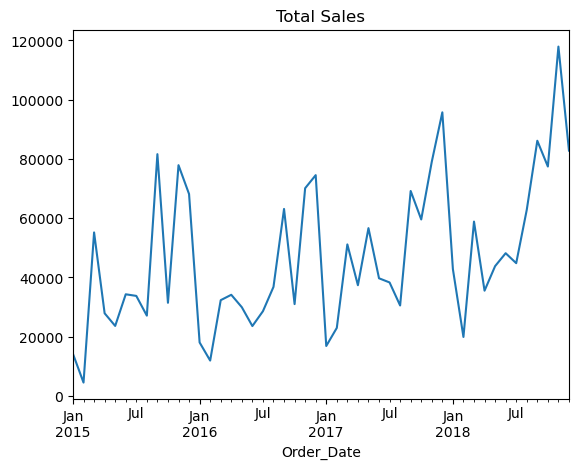

In [209]:
df2.plot(title='Total Sales')

show above is the total sales per month. We can see that there is a increaseing trend Also there is some pattern/seasonality present

In [371]:
new_df = df.copy()

In [372]:
# Splitting Order_Date into separate columns for Month, Day, and Year

new_df = df['Order_Date'].str.split('/', expand=True)
new_df.columns = ['Day','Month', 'Year']

# Combining new columns with original DataFrame
new_df = pd.concat([df, new_df], axis=1)
new_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date,Day,Month,Year
0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,08/11/2017,08,11,2017
1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,08/11/2017,08,11,2017
2,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12/06/2017,12,06,2017
3,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11/10/2016,11,10,2016
4,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11/10/2016,11,10,2016


In [373]:
new_df['Order_Date'] = pd.to_datetime(new_df['Order_Date'], format='%d/%m/%Y')

In [374]:
new_df.dtypes


Row ID                    int64
Order ID                 object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Order_Date       datetime64[ns]
Day                      object
Month                    object
Year                     object
dtype: object

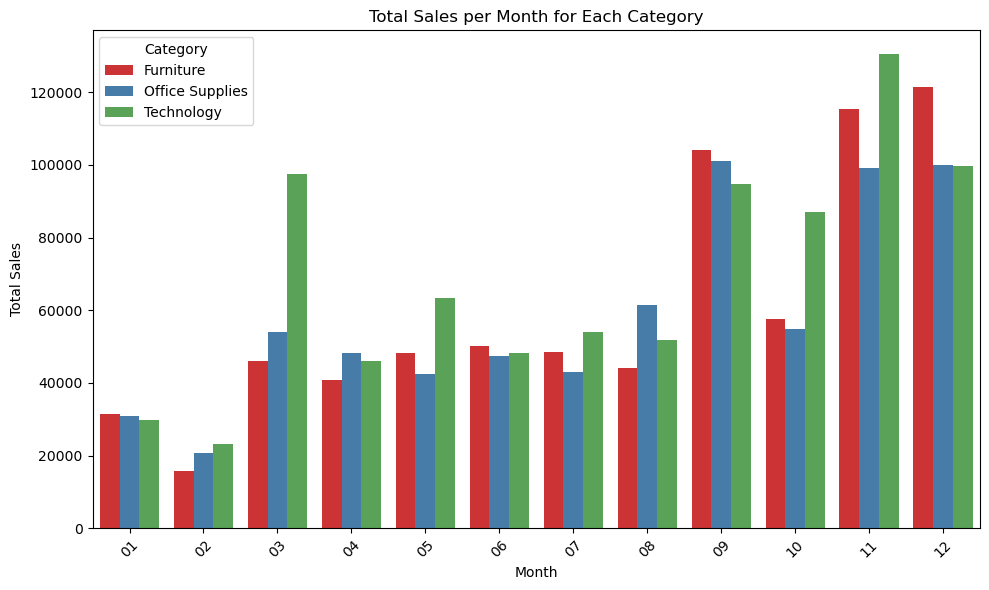

In [375]:
total_sales_per_month_category = new_df.groupby(['Month', 'Category'])['Sales'].sum().reset_index()

# Plotting total sales per month for each unique category
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Category', data=total_sales_per_month_category, palette='Set1')
plt.title('Total Sales per Month for Each Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Category')
plt.show()

The plot shows the total sales per categroy, per month.

Furniture sales are most in Decmeber. (Maybe due to Christmas deals) 
Office Supplies sales are most in August. 
Technology product sales are most in November. (Maybe due to Cyber monday deals) 



# QUESTION 2

##### Plotting monthly decomposition sales for trends and seasonality

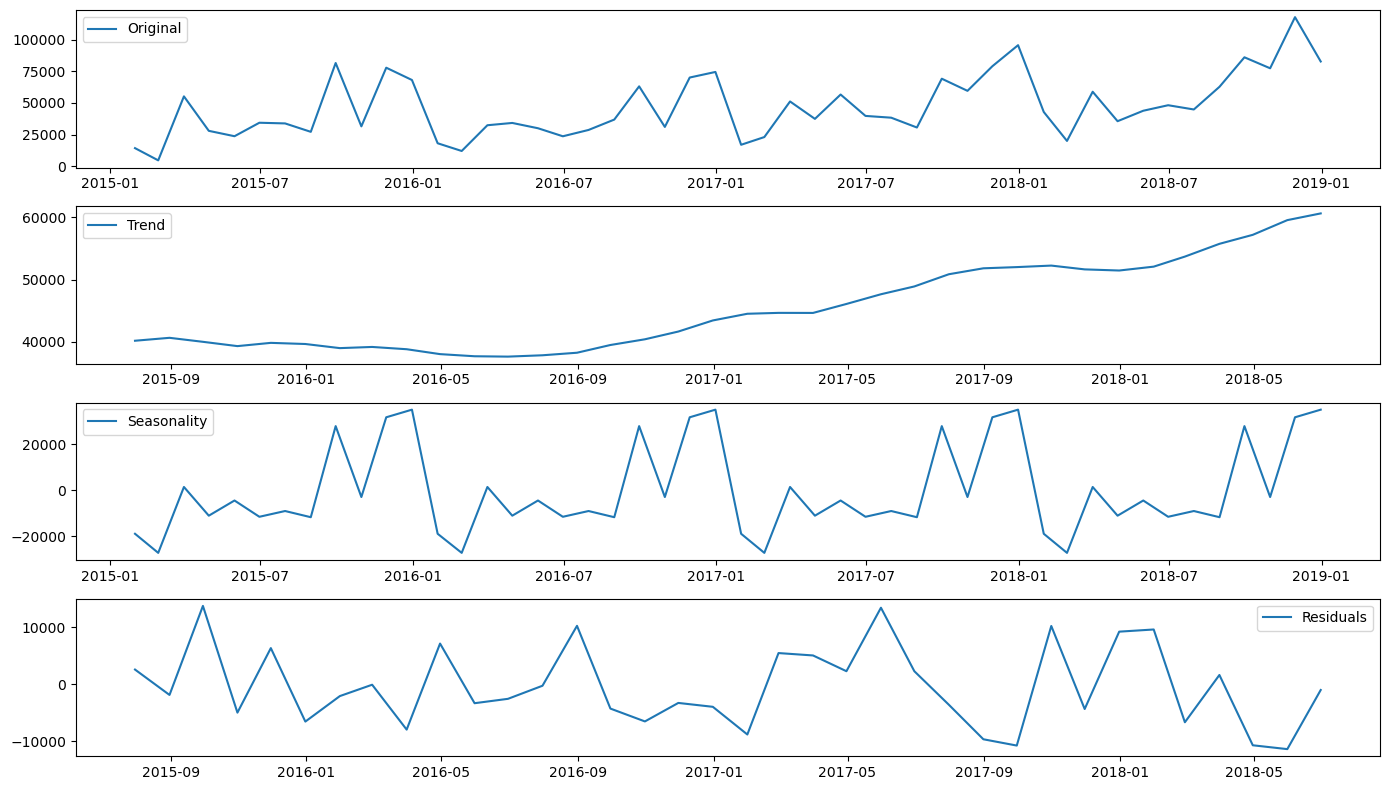

In [191]:
#  Plotting the decomposition results
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(df2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


##### Plotting ACF and PACF

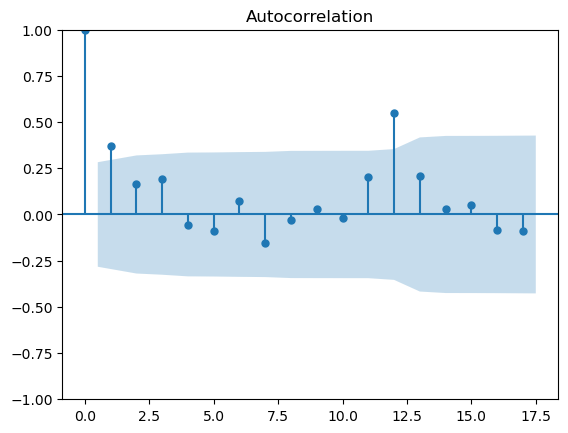

In [184]:
acf_plot = plot_acf(df2)

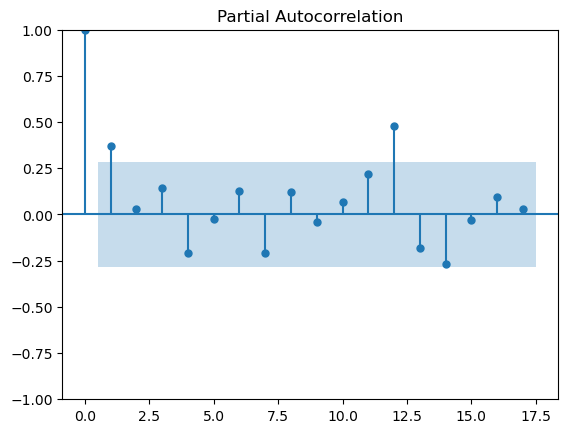

In [185]:
pacf_plot = plot_pacf(df2)

##### From the ACF and PACF plot, we can see that there is a correlation at lag = 1 and lag = 12

##### Check for stationarity using the Dickey-Fuller test

##### Perform the Augmented Dickey-Fuller test

In [284]:
result = adfuller(df2)

adf_statistic = round(result[0],4)
p_value = round(result[1],4)
is_stationary = p_value < 0.05

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Is the time series stationary? {"Yes" if is_stationary else "No"}')

ADF Statistic: -4.425
p-value: 0.0003
Is the time series stationary? Yes


##### Performing the Dickey-Fuller test for stationarity

H0: The time series is non-stationary.
H1: The time series is stationary.
 
Test statistics = -4.425
P-Value = 0.0003

Since the p-value is not less than .05, we fail to reject the null hypothesis.
This means the time series is non-stationary. 
In other words, it has some time-dependent structure and does not have constant variance over time



# Question 3

###### Fitted 2 Holt-Winters Exponential Smoothing model: One with multiplicative seasonality and the other with additive seasonality

C:\Users\Shivan\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shivan\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


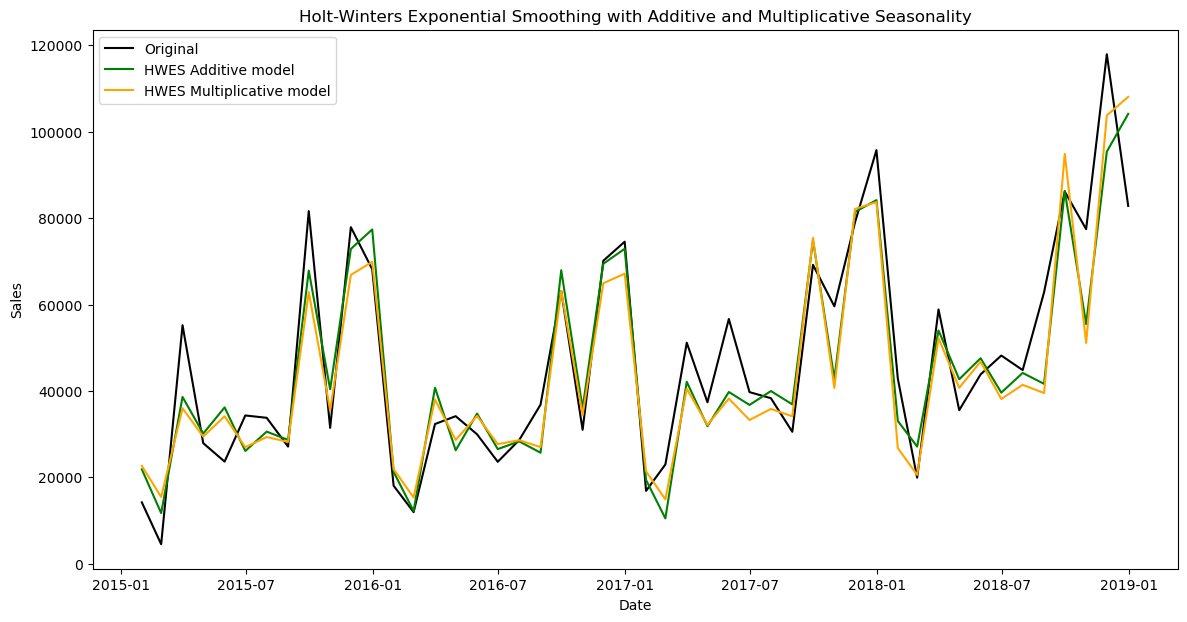

Additive Seasonality Model
Mean Squared Error (MSE): 96479894.1223185
Root Mean Squared Error (RMSE): 9822.417936654829
Mean Absolute Error (MAE): 7714.474067168398

Multiplicative Seasonality Model
Mean Squared Error (MSE): 111120101.32454817
Root Mean Squared Error (RMSE): 10541.351968535542
Mean Absolute Error (MAE): 8210.457060715293


In [290]:
# Fit the Holt-Winters model with additive seasonality
fit_add = ExponentialSmoothing(df2, seasonal='additive', seasonal_periods=12).fit()
hw_additive_fitted = fit_add.fittedvalues

# Fit the Holt-Winters model with multiplicative seasonality
fit_mul = ExponentialSmoothing(df2, seasonal='multiplicative', seasonal_periods=12).fit()
hw_multiplicative_fitted = fit_mul.fittedvalues


# Plot the original data and fitted values for both models
plt.figure(figsize=(14, 7))

plt.plot(df2, label='Original', color='black')
plt.plot(hw_additive_fitted, label='HWES Additive model', color='green')
plt.plot(hw_multiplicative_fitted, label='HWES Multiplicative model', color='orange')

plt.title('Holt-Winters Exponential Smoothing with Additive and Multiplicative Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



# performance metrics for the additive model
mse_add = mean_squared_error(df2, hw_additive_fitted)
rmse_add = mean_squared_error(df2, hw_additive_fitted, squared=False)
mae_add = mean_absolute_error(df2, hw_additive_fitted)

print('Additive Seasonality Model')
print(f'Mean Squared Error (MSE): {mse_add}')
print(f'Root Mean Squared Error (RMSE): {rmse_add}')
print(f'Mean Absolute Error (MAE): {mae_add}')

# performance metrics for the multiplicative model
mse_mul = mean_squared_error(df2, hw_multiplicative_fitted)
rmse_mul = mean_squared_error(df2, hw_multiplicative_fitted, squared=False)
mae_mul = mean_absolute_error(df2, hw_multiplicative_fitted)

print('\nMultiplicative Seasonality Model')
print(f'Mean Squared Error (MSE): {mse_mul}')
print(f'Root Mean Squared Error (RMSE): {rmse_mul}')
print(f'Mean Absolute Error (MAE): {mae_mul}')


##### Conclusion:
Based on these performance metrics, the HWES model with additive seasonality model generally outperforms the multiplicative seasonality model in terms of prediction accuracy. It demonstrates lower errors across all metrics (MSE, RMSE, MAE), suggesting that it captures the underlying patterns and seasonality more effectively than the HWES model with multiplicative seasonality.



##### Holt-Winters Exponential Smoothing Forecast (additive seasonality)

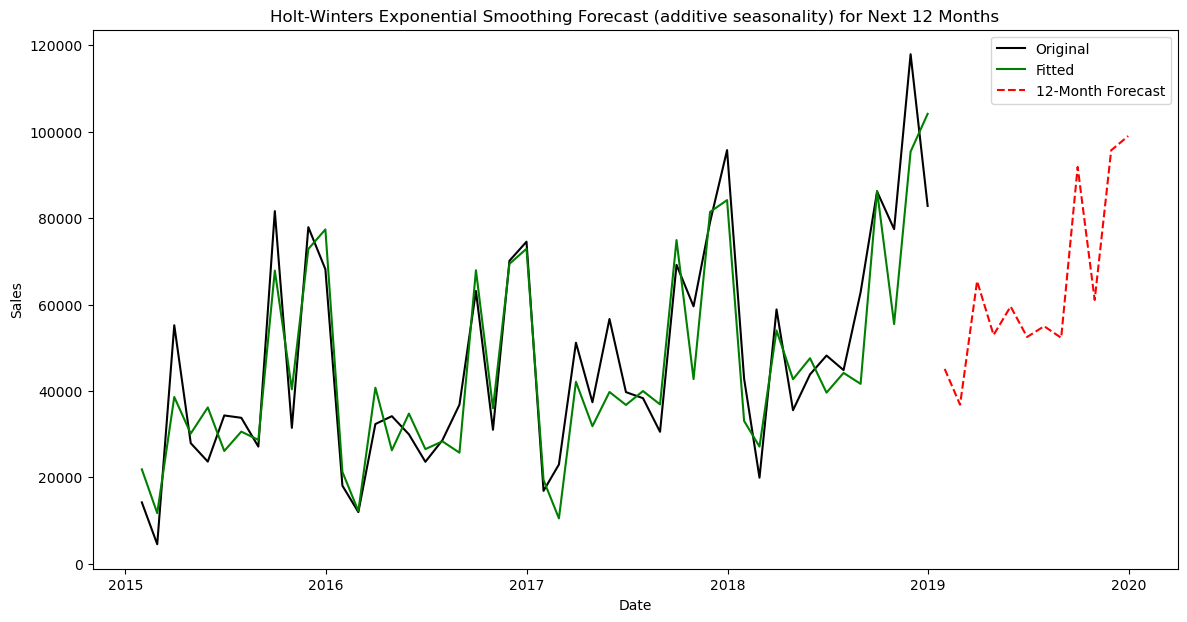

In [293]:
# Forecast sales for the next 12 months
forecast_12_months_add = fit_add.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(14, 7))
plt.plot(df2, label='Original', color='black')
plt.plot(hw_additive_fitted, label='Fitted', color='green')
plt.plot(forecast_12_months_add, label='12-Month Forecast', color='red', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing Forecast (additive seasonality) for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Question 4


##### Fitting AR, MA, ARIMA, SARIMA

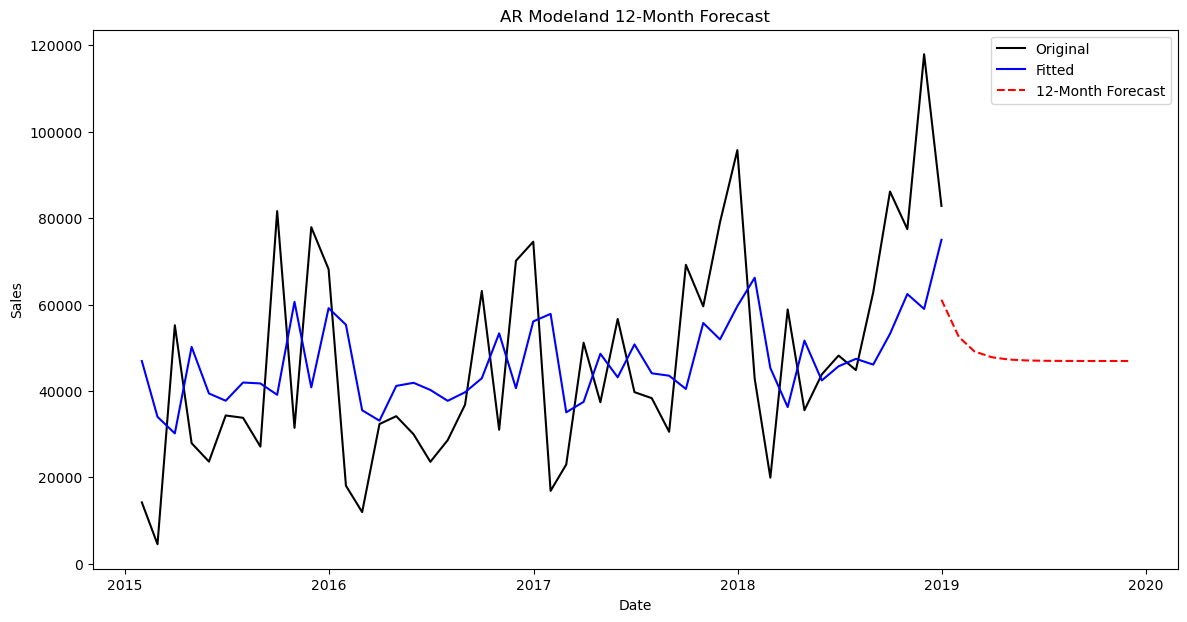

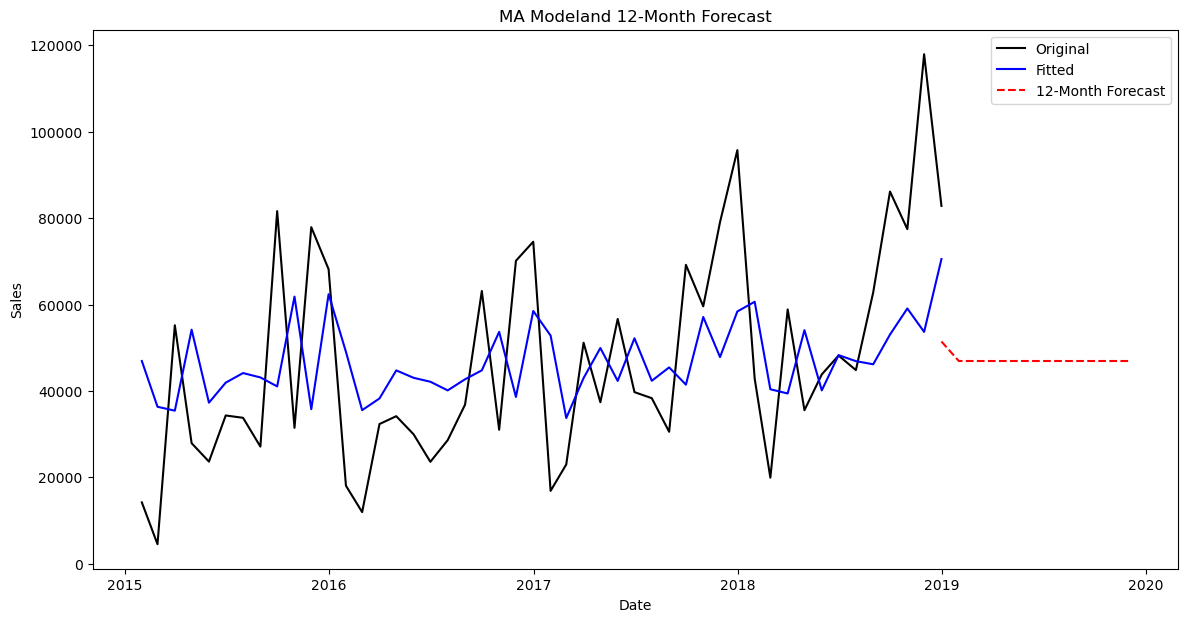

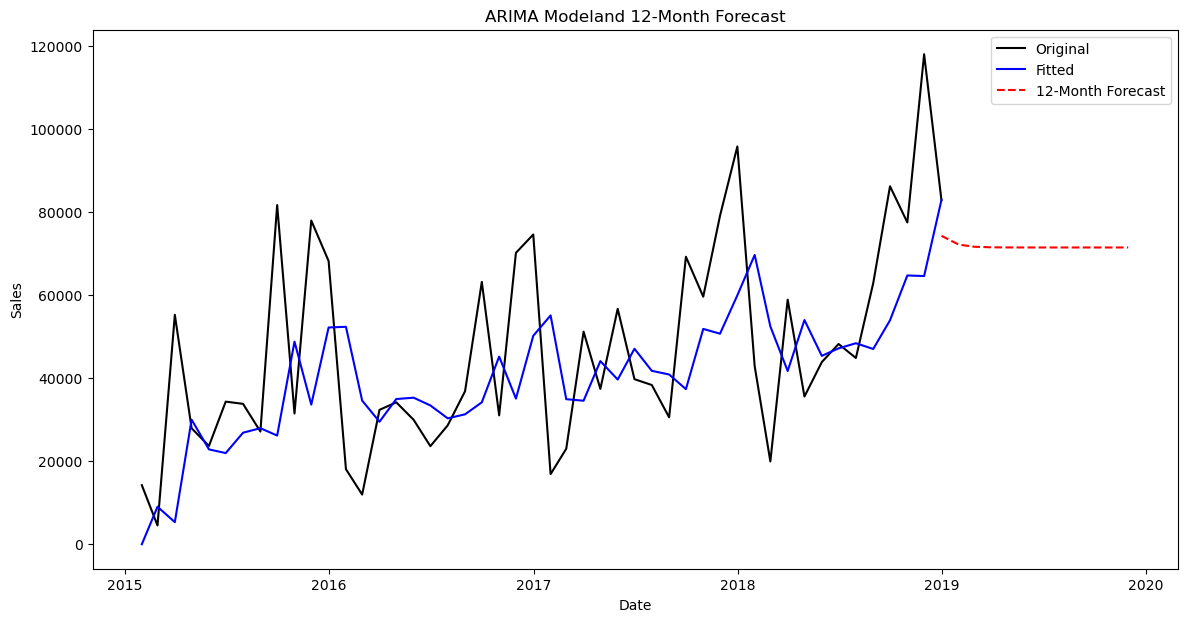

C:\Users\Shivan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


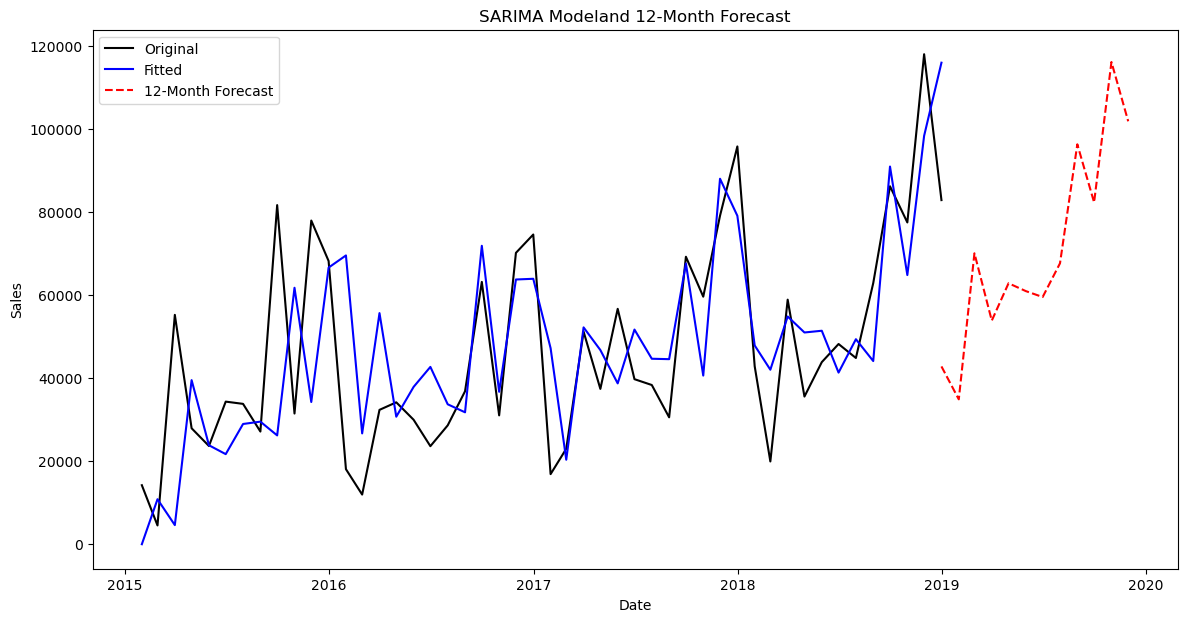

In [297]:
df2.index = pd.to_datetime(df2.index)

# Function to plot the original data, fitted values, and 12-month forecast
def plot_forecast(model_name, df2, fitted_values, forecast_12_months):
    plt.figure(figsize=(14, 7))
    plt.plot(df2, label='Original', color='black')
    plt.plot(fitted_values, label='Fitted', color='blue')
    plt.plot(pd.date_range(start=df2.index[-1], periods=12, freq='M'), forecast_12_months, label='12-Month Forecast', color='red', linestyle='--')
    plt.title(f'{model_name} Modeland 12-Month Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Fit and forecast using the AR model
ar_order = 1
ar_model = ARIMA(df2, order=(ar_order, 0, 0)).fit()
ar_fitted = ar_model.fittedvalues
ar_forecast_12_months = ar_model.forecast(steps=12)
plot_forecast('AR', df2, ar_fitted, ar_forecast_12_months)

# Fit and forecast using the MA model
ma_order = 1
ma_model = ARIMA(df2, order=(0, 0, ma_order)).fit()
ma_fitted = ma_model.fittedvalues
ma_forecast_12_months = ma_model.forecast(steps=12)
plot_forecast('MA', df2, ma_fitted, ma_forecast_12_months)

# Fit and forecast using the ARIMA model
arima_order = (1, 1, 1)
arima_model = ARIMA(df2, order=arima_order).fit()
arima_fitted = arima_model.fittedvalues
arima_forecast_12_months = arima_model.forecast(steps=12)
plot_forecast('ARIMA', df2, arima_fitted, arima_forecast_12_months)

# Fit and forecast using the SARIMA model
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)
sarima_model = SARIMAX(df2, order=sarima_order, seasonal_order=seasonal_order).fit()
sarima_fitted = sarima_model.fittedvalues
sarima_forecast_12_months = sarima_model.forecast(steps=12)
plot_forecast('SARIMA', df2, sarima_fitted, sarima_forecast_12_months)


In [271]:
# Function to print model performance
def print_performance(model_name, actual, fitted_values):
    mse = mean_squared_error(actual, fitted_values)
    rmse = mean_squared_error(actual, fitted_values, squared=False)
    mae = mean_absolute_error(actual, fitted_values)
    print(f'----------------------------------------------\n {model_name} \n')
    print(f'{model_name} - Mean Squared Error (MSE): {mse}')
    print(f'{model_name} - Root Mean Squared Error (RMSE): {rmse}')
    print(f'{model_name} - Mean Absolute Error (MAE): {mae}')


# Assessing the following models
print_performance('AR', df2, ar_fitted)

print_performance('MA', df2, ma_fitted)

print_performance('ARIMA', df2, arima_fitted)

print_performance('SARIMA', df2, sarima_fitted)


----------------------------------------------
 AR 

AR - Mean Squared Error (MSE): 520184705.0621148
AR - Root Mean Squared Error (RMSE): 22807.558068809445
AR - Mean Absolute Error (MAE): 18988.38979134352
----------------------------------------------
 MA 

MA - Mean Squared Error (MSE): 530028604.67620045
MA - Root Mean Squared Error (RMSE): 23022.3501119282
MA - Mean Absolute Error (MAE): 19260.42332581672
----------------------------------------------
 ARIMA 

ARIMA - Mean Squared Error (MSE): 531440327.81189245
ARIMA - Root Mean Squared Error (RMSE): 23052.989563436073
ARIMA - Mean Absolute Error (MAE): 17516.949340398063
----------------------------------------------
 SARIMA 

SARIMA - Mean Squared Error (MSE): 385920495.483428
SARIMA - Root Mean Squared Error (RMSE): 19644.859263517974
SARIMA - Mean Absolute Error (MAE): 14361.215546519028


##### Conclusion:
Based on these performance metrics, SARIMA appears to be the best performing model among the ones tested for your dataset. It demonstrates lower errors across all metrics (MSE, RMSE, MAE), suggesting that it captures the underlying patterns and seasonality in your data more effectively than AR, MA, and ARIMA models.
